In [1]:
#addprocs(20)
using Revise
using Grid
using Interpolation
using Signals
using DeConv
using Plots
#using PyPlot

INFO: Recompiling stale cache file /math/home/pawbz/.julia/lib/v0.6/DeConv.ji for module DeConv.
ERROR: LoadError: UndefVarError: ObsModel not defined
Stacktrace:
 [1] include_from_node1(::String) at ./loading.jl:576
 [2] include(::String) at ./sysimg.jl:14
 [3] anonymous at ./<missing>:2
while loading /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, in expression starting on line 20


LoadError: [91mFailed to precompile DeConv to /math/home/pawbz/.julia/lib/v0.6/DeConv.ji.[39m

In [3]:
# create toy Greens functions
ntg=20
nr=40
tfact=80;
gobs=zeros(ntg, nr)
Signals.DSP.toy_green!(gobs,bfrac=0.2, nevents=3, afrac=[2.0, 0.5, 0.25]);
#randn!(gobs)

In [4]:
nt = ntg*tfact
δt=0.0001; # results of independent of this
tgridnoise=Grid.M1D(0., Float64(ntg*tfact), ntg*tfact)

Grid.M1D([0.0, 1.00063, 2.00125, 3.00188, 4.0025, 5.00313, 6.00375, 7.00438, 8.005, 9.00563  …  1590.99, 1591.99, 1593.0, 1594.0, 1595.0, 1596.0, 1597.0, 1598.0, 1599.0, 1600.0], 1600, 1.0006253908692933)

In [5]:
# be careful while executing this -- over writes
# dummy tgridg
#tgridg=JuMIT.Grid.M1D(0., 0.1, pacorr.ntg)
#JuMIT.DeConv.save(pacorr, "/home/pawbz/Dropbox (MIT)/ica_seg/paper/FIG/ToyDecon/dat", tgridg=tgridg)


In [8]:
# uncorrelated source
#sobs=randn(nt);
#normalize!(sobs)

# correlated source
sobs=zeros(nt)
Signals.DSP.freq_rand!(sobs, tgrid=tgridnoise, nevent_fracs=inv(tfact).*[0.2, 0.5, 0.8])

#pa=DeConv.Param(ntg, nt, nr, gobs=gobs,fft_threads=true, 
#    snorm_flag=false, 
#    sobs=sobs, verbose=false, mode=:ibd);

DeConv.plot(pa,attrib=:obs)
saobs=xcorr(sobs, sobs)
gij=(Conv.xcorr(pa.gobs))



40-element Array{Array{Float64,2},1}:
 [0.0 -5.14886e-18 … 5.14886e-18 -1.02977e-17; 2.57443e-18 -2.57443e-18 … 7.72329e-18 3.6042e-17; … ; 8.8227e-18 -2.7465e-17 … 7.02409e-18 -5.21057e-17; 2.11082e-18 1.21483e-17 … -5.0357e-18 2.57443e-18]               
 [3.86165e-18 -1.73774e-17 … 1.28722e-17 -2.41353e-18; 2.57443e-18 3.08932e-17 … 9.01051e-18 -1.02977e-17; … ; 9.33688e-19 -9.22152e-18 … -2.12206e-18 5.75348e-17; 1.13219e-17 1.24029e-17 … -2.0041e-17 -2.47145e-17]   
 [-3.34676e-17 2.57443e-18 … 2.25263e-17 -2.54225e-17; 1.19067e-17 7.72329e-18 … 2.05954e-17 2.57443e-18; … ; 1.14849e-17 7.58354e-18 … 1.40586e-17 0.0; -2.36276e-17 1.29761e-18 … -1.96674e-17 -2.93811e-17]            
 [0.0 -1.52857e-18 … 0.0 -1.28722e-17; 1.8021e-17 6.17863e-17 … 3.86165e-18 -4.11909e-17; … ; 2.25889e-17 -2.68771e-17 … -1.72253e-17 2.26732e-17; 0.0 -1.02154e-18 … 0.0 6.9754e-18]                                     
 [5.14886e-18 -5.14886e-18 … -1.8021e-17 -3.86165e-17; 2.25263e-17 -3.6042e-17 … -5.40

In [11]:
g=DeConv.phase_retrievel(gij, nt, nr)

Iter     Function value   Gradient norm 
     0     2.199344e+09     6.126251e+05


     1     4.556330e+08     1.914881e+05
     2     8.695825e+07     5.505671e+04
     3     1.654017e+07     1.584353e+04
     4     3.142383e+06     4.557447e+03
     5     5.973418e+05     1.310263e+03
     6     1.140610e+05     3.766235e+02
     7     2.230494e+04     1.082773e+02
     8     4.885746e+03     3.118846e+01
     9     1.579088e+03     8.989921e+00
    10     9.513831e+02     2.575197e+00
    11     8.319405e+02     7.171647e-01
    12     8.077311e+02     3.985251e-01
    13     7.992505e+02     1.019597e+00
    14     7.968461e+02     3.685861e-01
    15     7.937587e+02     3.321926e-01
    16     7.924554e+02     4.688993e-01
    17     7.916296e+02     3.222609e-01
    18     7.905287e+02     1.679318e-01
    19     7.899700e+02     2.179839e-01
    20     7.896240e+02     1.786860e-01
    21     7.891060e+02     2.624174e-01
    22     7.887087e+02     1.645489e-01
    23     7.884614e+02     1.621088e-01
    24     7.882630e+02     1.088633e-01
    25     7.880

1600×40 Array{Float64,2}:
 -0.0158702   -0.0981522   -0.0779138   …   3.92604e-6   8.62864e-7
  0.0445886    0.087592     0.016816        1.40938e-6  -1.76536e-7
 -0.0529668    0.0465917    0.0735789      -1.45609e-6   1.50392e-6
  0.07433     -0.0158263   -0.0158589       9.86843e-7  -4.78188e-6
  0.00174022  -0.0676075   -0.0609353      -2.2129e-6   -6.3477e-6 
  0.0667654   -0.0213067   -0.0229665   …   5.08945e-7  -3.57888e-7
 -0.12173      0.0839678    0.0126814       1.0978e-6    3.57884e-6
  0.0328868   -0.0274958   -0.0261258       3.94527e-6   5.5135e-6 
 -0.0151511   -0.0317214    0.0431479       6.54655e-6  -1.01706e-6
 -0.0509717    0.0506984   -0.086673        3.00325e-6   3.14545e-6
 -0.0150818   -0.0610331    0.0113817   …   5.80685e-6   5.43861e-7
  0.0134565    0.0253078    0.0527248       5.69043e-6   1.88201e-7
  0.110346    -0.026531    -0.058809       -7.61623e-7   1.11046e-6
  ⋮                                     ⋱                          
 -0.00390199   0.00469

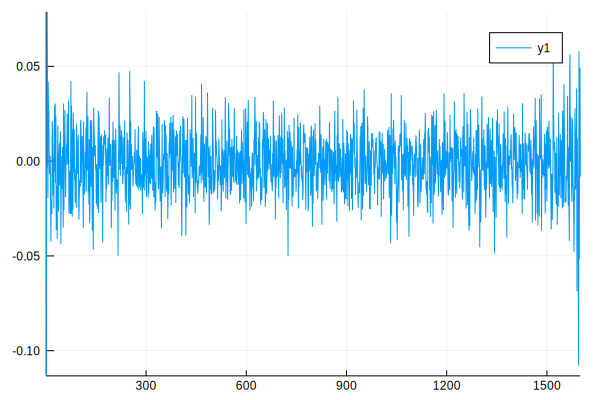

In [15]:
Plots.plot(g[:,4])

In [16]:
gprecon, gweights, sprecon = DeConv.create_weights(ntg, nt, gobs);
pa=DeConv.Param(ntg, nt, nr, gobs=gobs,fft_threads=true, gweights=gweights, gprecon=gprecon,
    snorm_flag=false, 
    sobs=sobs, verbose=false, mode=:bda, saobs=xcorr(sobs,sobs), fftwflag=FFTW.MEASURE);

DeConv.plot(pa,attrib=:obs)

mutable struct Param # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 21:
    ntg::Int64 # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 22:
    nt::Int64 # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 23:
    nr::Int64 # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 24:
    nra::Int64 # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 25:
    om::ObsModel # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 26:
    obs::Conv.Param{Float64, 2, 2, 1} # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 27:
    cal::Conv.Param{Float64, 2, 2, 1} # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 28:
    calsave::Conv.Param{Float64, 2, 2, 1} # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 29:
    dg::Array{Float64, 2} # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 30:
    ds::Vector{Float64} # /math/home/pawbz/.julia/v0.6/DeConv/src/DeConv.jl, line 31:
    ddcal::Array{Float64, 2} # /math/home/pawbz/.julia

LoadError: [91mtype Param has no field om[39m

In [174]:
pa.mode = :bda
DeConv.bd!(pa)

Blind Decon	 alternate optimization
trip	|		op 1	(1.0e-08)	|		op 2	(1.0e-08)	|
 ──────────────────────────────────────────────────────────────────────────────
                                       Time                   Allocations      
                               ──────────────────────   ───────────────────────
       Tot / % measured:            1.36s / 100%            15.8MiB / 100%     

 Section               ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────────
 op 1 in each round...      1    1.18s  86.8%   1.18s   15.6MiB  99.1%  15.6MiB
 op 2 in each round...      1    180ms  13.2%   180ms    145KiB  0.90%   145KiB
 ──────────────────────────────────────────────────────────────────────────────
1	|	1.000000e+00			|	1.000000e+00			|
2	|	1.145110e+00	(1.451099e-01)	|	8.314485e-01	(1.685515e-01)	|
3	|	6.060379e-01	(4.707601e-01)	|	7.382289e-01	(1.121171e-01)	|
4	|	4.732560e-01	(2.190984e-01)	|	

LoadError: [91mInterruptException:[39m

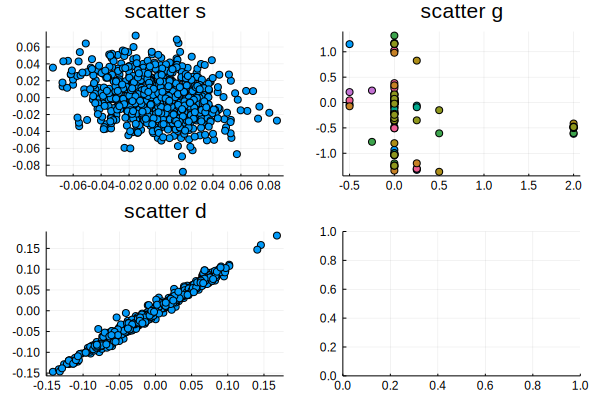

In [176]:
DeConv.plot(pa,attrib=:x)

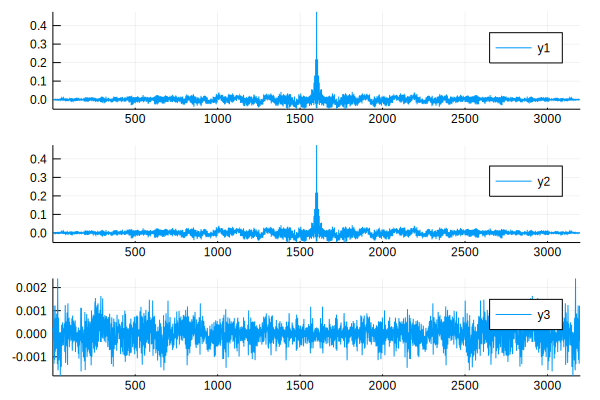

In [172]:
a=xcorr(pa.cal.s, pa.cal.s)
normalize!(a)
b=xcorr(sobs, sobs)
normalize!(b)
Plots.plot([a,b,a-b], layout=(3,1))

In [ ]:
pap=DeConv.ParamP(ntg, nt, nr, saobs=xcorr(sobs, sobs), dobs=pa.obs.d, sobs=sobs, gobs=gobs)
DeConv.update_all!(pap, max_roundtrips=100000)

Phase Retrieval	 alternate optimization
trip	|		op 1	(1.0e-06)	|		op 2	(1.0e-06)	|
 ──────────────────────────────────────────────────────────────────────────────
                                       Time                   Allocations      
                               ──────────────────────   ───────────────────────
       Tot / % measured:            6.15s / 100%             688KiB / 98.0%    

 Section               ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────────
 op 1 in each round...      1    5.51s  89.6%   5.51s    551KiB  81.7%   551KiB
 op 2 in each round...      1    642ms  10.4%   642ms    124KiB  18.3%   124KiB
 ──────────────────────────────────────────────────────────────────────────────
1	|	1.000000e+00			|	1.000000e+00			|
2	|	1.088124e-03	(9.989119e-01)	|	4.931141e-01	(5.068859e-01)	|
3	|	6.321391e-04	(4.190559e-01)	|	3.192656e-01	(3.525523e-01)	|
4	|	4.436503e-04	(2.981761e-01

2440	|	6.215505e-07	(1.258971e-03)	|	3.809407e-04	(1.258946e-03)	|
2460	|	6.060995e-07	(1.256857e-03)	|	3.714714e-04	(1.256806e-03)	|
2480	|	5.910600e-07	(1.254597e-03)	|	3.622542e-04	(1.254531e-03)	|
2500	|	5.764177e-07	(1.252412e-03)	|	3.532805e-04	(1.252356e-03)	|
2520	|	5.621639e-07	(1.250188e-03)	|	3.445449e-04	(1.250166e-03)	|
2540	|	5.482885e-07	(1.247701e-03)	|	3.360412e-04	(1.247682e-03)	|
2560	|	5.347780e-07	(1.245534e-03)	|	3.277611e-04	(1.245474e-03)	|
2580	|	5.216264e-07	(1.243026e-03)	|	3.197010e-04	(1.242992e-03)	|
2600	|	5.088237e-07	(1.240539e-03)	|	3.118547e-04	(1.240501e-03)	|
2620	|	4.963582e-07	(1.238198e-03)	|	3.042150e-04	(1.238152e-03)	|
2640	|	4.842221e-07	(1.235760e-03)	|	2.967773e-04	(1.235666e-03)	|
2660	|	4.724065e-07	(1.233240e-03)	|	2.895359e-04	(1.233172e-03)	|
2680	|	4.609027e-07	(1.230594e-03)	|	2.824857e-04	(1.230519e-03)	|
2700	|	4.497024e-07	(1.228144e-03)	|	2.756214e-04	(1.228051e-03)	|
2720	|	4.387965e-07	(1.225549e-03)	|	2.689375e-04	(1.225488e-0

4900	|	4.769785e-08	(7.669282e-04)	|	2.924061e-05	(7.667850e-04)	|
4920	|	4.697251e-08	(7.637118e-04)	|	2.879601e-05	(7.636055e-04)	|
4940	|	4.626237e-08	(7.607449e-04)	|	2.836074e-05	(7.606492e-04)	|
4960	|	4.556741e-08	(7.532495e-04)	|	2.793476e-05	(7.531788e-04)	|
4980	|	4.488672e-08	(7.501521e-04)	|	2.751753e-05	(7.500413e-04)	|
5000	|	4.422018e-08	(7.465392e-04)	|	2.710897e-05	(7.464520e-04)	|
5020	|	4.356775e-08	(7.410003e-04)	|	2.670907e-05	(7.408824e-04)	|
5040	|	4.292849e-08	(7.366250e-04)	|	2.631723e-05	(7.365065e-04)	|
5060	|	4.230244e-08	(7.319252e-04)	|	2.593349e-05	(7.318065e-04)	|
5080	|	4.168935e-08	(7.287299e-04)	|	2.555769e-05	(7.286190e-04)	|
5100	|	4.108878e-08	(7.216523e-04)	|	2.518956e-05	(7.215440e-04)	|
5120	|	4.050021e-08	(7.190333e-04)	|	2.482879e-05	(7.189154e-04)	|
5140	|	3.992368e-08	(7.129683e-04)	|	2.447540e-05	(7.128949e-04)	|
5160	|	3.935850e-08	(7.112480e-04)	|	2.412897e-05	(7.111612e-04)	|
5180	|	3.880478e-08	(7.066183e-04)	|	2.378956e-05	(7.065201e-0

7360	|	1.188675e-08	(4.415260e-04)	|	7.288224e-06	(4.414996e-04)	|
7380	|	1.178237e-08	(4.405803e-04)	|	7.224232e-06	(4.405562e-04)	|
7400	|	1.167913e-08	(4.399889e-04)	|	7.160934e-06	(4.399712e-04)	|
7420	|	1.157702e-08	(4.382962e-04)	|	7.098328e-06	(4.382729e-04)	|
7440	|	1.147600e-08	(4.378486e-04)	|	7.036394e-06	(4.378293e-04)	|
7460	|	1.137604e-08	(4.369403e-04)	|	6.975104e-06	(4.369180e-04)	|
7480	|	1.127718e-08	(4.361169e-04)	|	6.914491e-06	(4.360962e-04)	|
7500	|	1.117936e-08	(4.350602e-04)	|	6.854520e-06	(4.350262e-04)	|
7520	|	1.108257e-08	(4.346553e-04)	|	6.795179e-06	(4.346391e-04)	|
7540	|	1.098683e-08	(4.337263e-04)	|	6.736474e-06	(4.337085e-04)	|
7560	|	1.089209e-08	(4.322939e-04)	|	6.678390e-06	(4.322746e-04)	|
7580	|	1.079835e-08	(4.319297e-04)	|	6.620920e-06	(4.319163e-04)	|
7600	|	1.070557e-08	(4.310820e-04)	|	6.564032e-06	(4.310704e-04)	|
7620	|	1.061374e-08	(4.298049e-04)	|	6.507729e-06	(4.297820e-04)	|
7640	|	1.052286e-08	(4.297221e-04)	|	6.452009e-06	(4.297086e-0

9820	|	4.336106e-09	(3.947223e-04)	|	2.658696e-06	(3.946990e-04)	|
9840	|	4.302016e-09	(3.935883e-04)	|	2.637793e-06	(3.936223e-04)	|
9860	|	4.268185e-09	(3.947673e-04)	|	2.617050e-06	(3.947360e-04)	|
9880	|	4.234642e-09	(3.936502e-04)	|	2.596483e-06	(3.936603e-04)	|
9900	|	4.201360e-09	(3.944119e-04)	|	2.576077e-06	(3.943718e-04)	|
9920	|	4.168351e-09	(3.932125e-04)	|	2.555837e-06	(3.932436e-04)	|
9940	|	4.135584e-09	(3.948909e-04)	|	2.535746e-06	(3.949125e-04)	|
9960	|	4.103110e-09	(3.933490e-04)	|	2.515834e-06	(3.933615e-04)	|
9980	|	4.070882e-09	(3.940526e-04)	|	2.496074e-06	(3.940243e-04)	|
10000	|	4.038914e-09	(3.941648e-04)	|	2.476473e-06	(3.941563e-04)	|
10020	|	4.007192e-09	(3.941139e-04)	|	2.457023e-06	(3.941261e-04)	|
10040	|	3.975724e-09	(3.941961e-04)	|	2.437728e-06	(3.941917e-04)	|
10060	|	3.944525e-09	(3.933961e-04)	|	2.418598e-06	(3.933826e-04)	|
10080	|	3.913573e-09	(3.938546e-04)	|	2.399620e-06	(3.938261e-04)	|
10100	|	3.882879e-09	(3.935989e-04)	|	2.380800e-06	(3.935

12240	|	1.679517e-09	(3.904026e-04)	|	1.029803e-06	(3.904132e-04)	|
12260	|	1.666449e-09	(3.906272e-04)	|	1.021790e-06	(3.906045e-04)	|
12280	|	1.653486e-09	(3.893848e-04)	|	1.013842e-06	(3.894014e-04)	|
12300	|	1.640619e-09	(3.906455e-04)	|	1.005953e-06	(3.906119e-04)	|
12316	|	1.630410e-09	(3.898038e-04)	|	9.996931e-07	(3.897971e-04)	|
Blind Decon Errors	
0×4 DataFrames.DataFrame
Phase Retrieval	CONVERGED in 1 reroundtrips
Blind Decon Errors	
0×4 DataFrames.DataFrame
 


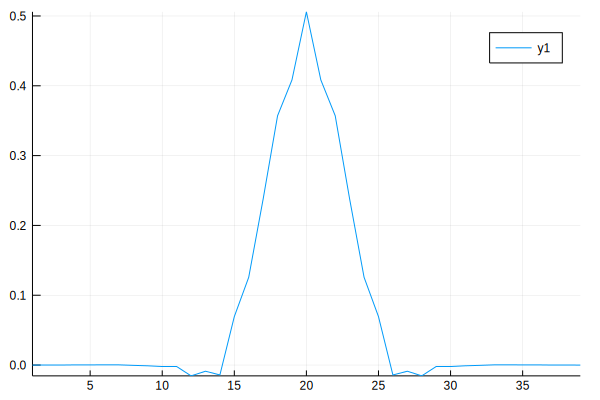

In [154]:
a=xcorr(pap.cal1.g[:,1], pap.cal1.g[:,1])
b=xcorr(gobs[:,2], gobs[:,2])
#a=xcorr(sobs, pap.cal2.g)
#b=xcorr(sobs,sobs)
normalize!(a)
normalize!(b)
Plots.plot(a)
#Plots.plot!(b)
#Plots.plot(xcorr(sobs, pap.cal2.g)-xcorr(sobs,sobs))
#Plots.plot(xcorr(pap.cal1.g[:,1], pap.cal1.g[:,1]))
#Plots.plot!(xcorr(gobs[:,2], gobs[:,2]))

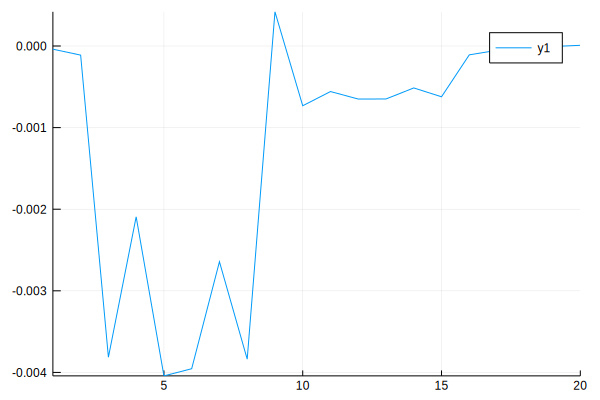

In [149]:
Plots.plot(pap.cal1.g[:,4])

In [91]:
DeConv.plot(pa,attrib=:x)

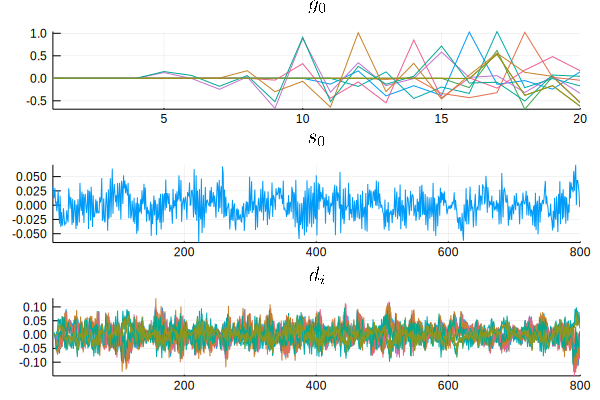

In [96]:
DeConv.plot(pa,attrib=:cal)

In [7]:
DeConv.fbd!(pa)

Blind Decon	 alternate optimization
trip	|		op 1	(1.0e-08)	|		op 2	(1.0e-08)	|
 

──────────────────────────────────────────────────────────────────────────────
                                       Time                   Allocations      
                               ──────────────────────   ───────────────────────
       Tot / % measured:            859ms / 69.8%           4.59MiB / 40.7%    

 Section               ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────────
 op 2 in each round...      1    337ms  56.3%   337ms   1.25MiB  66.7%  1.25MiB
 op 1 in each round...      1    262ms  43.7%   262ms    637KiB  33.3%   637KiB
 ──────────────────────────────────────────────────────────────────────────────
1	|	1.000000e+00			|	1.000000e+00			|
2	|	1.324423e-02	(9.867558e-01)	|	1.170742e-01	(8.829258e-01)	|
3	|	1.126364e-02	(1.495439e-01)	|	1.088988e-01	(6.983079e-02)	|
4	|	1.068957e-02	(5.096634e-02)	|	1.042766e-01	(4.244533e-02)	|


LoadError: [91mInterruptException:[39m

In [29]:
DeConv.update_calsave!(pa)
DeConv.err!(pa)
pa.err

Blind Decon Errors	
1×4 DataFrames.DataFrame
│ Row │ g         │ g_nodecon │ s          │ d         │
├─────┼───────────┼───────────┼────────────┼───────────┤
│ 1   │ 0.0212313 │ 1.02318   │ 0.00992499 │ 0.0131842 │

1×4 DataFrames.DataFrame
│ Row │ g         │ g_nodecon │ s          │ d         │
├─────┼───────────┼───────────┼────────────┼───────────┤
│ 1   │ 0.0212313 │ 1.02318   │ 0.00992499 │ 0.0131842 │

In [26]:
DeConv.plot(pa, attrib=:x)

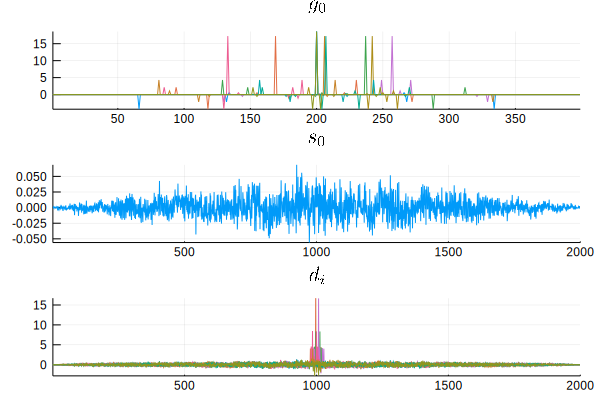

In [31]:
DeConv.plot(pa, attrib=:obs)

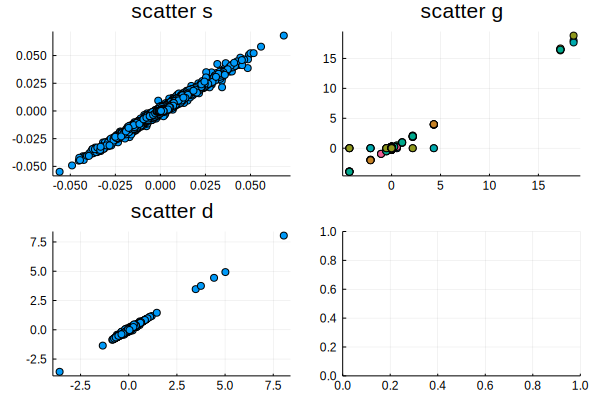

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [32]:
DeConv.plot(pa, attrib=:x)